<a href="https://colab.research.google.com/github/AsraniSanjana/All_Codes/blob/main/All_Semester_Codes/ML_sem7/models/ML02_D17B1_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Logistic Regression**
Lab 2

Group members:
Sanjana Asrani (01) ;
Vivek Balani (05) ;
Yash Brid (11) ;
Neeraj Chawla (12) ;

Reference link - https://www.javatpoint.com/logistic-regression-in-machine-learning

Dataset: [suv_data.csv](https://drive.google.com/file/d/1ZxO1j6kdp4JfJVKX04gcqA_q9dflltj9/view?usp=sharing)

# Importing Libraries
This cell is used to import the necessary libraries for your logistic regression analysis. It includes imports for numpy, matplotlib.pyplot, pandas, and various modules from sklearn for metrics and data preprocessing.

In [ ]:
#Data Pre-procesing Step
# importing libraries
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score

#importing datasets
data_set= pd.read_csv('/content/suv_data.csv')

# Loading, Extracting and Displaying Data
In this cell, you load a dataset named "suv_data.csv". Then, you extract the independent variables (features) into x and the dependent variable (target) into y. The dataset is loaded from a CSV file named "diabetes.csv". The column names are defined, and the data is loaded into a Pandas DataFrame. Additionally, the first row is removed to exclude any header row.

In [ ]:
#Extracting Independent and dependent Variable
x= data_set.iloc[:, [2,3]].values
y= data_set.iloc[:, 4].values

In [ ]:
col_names = ['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased']
pima = pd.read_csv("/content/suv_data.csv", header=None, names=col_names)
pima = pima.iloc[1: , :]
pima.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
1,15624510,Male,19,19000,0
2,15810944,Male,35,20000,0
3,15668575,Female,26,43000,0
4,15603246,Female,27,57000,0
5,15804002,Male,19,76000,0


# Splitting Data into Train and Test Sets
This cell splits the dataset into training and test sets using the train_test_split function from sklearn. It creates x_train, x_test, y_train, and y_test.

In [ ]:
# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

# Feature Scaling
This cell performs feature scaling on the training and test sets using StandardScaler from sklearn.preprocessing. It ensures that the features are on the same scale for more effective modeling.

In [ ]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

# Fitting Logistic Regression Model
Here, you create a logistic regression classifier (classifier) using LogisticRegression from sklearn.linear_model and fit it to the training data.

In [ ]:
#Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

# Displaying Logistic Regression Model Parameters
This cell displays the parameters of the fitted logistic regression model. It provides information about the configuration of the model.

In [ ]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',  random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(multi_class='warn', random_state=0, solver='warn')

# Predicting Test Set Results
This cell predicts the target variable values for the test set using the trained logistic regression model.

In [ ]:
#Predicting the test set result
y_pred= classifier.predict(x_test)

# Creating and Displaying Confusion Matrix
This cell calculates and displays the confusion matrix based on the predicted values and actual values of the test set. Additionally, it defines a function to plot the confusion matrix in a readable format.

In [ ]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
def plot(y_true, y_pred):
  labels = unique_labels(y_test)
  column = [f'Predicted({label})' for label in labels]
  indices = [f'Actual({label})' for label in labels]
  table = pd.DataFrame(confusion_matrix(y_true, y_pred),
                       columns = column, index = indices)
  return table
print("The confusion matrix of the model is, \n")
plot(y_test, y_pred)

The confusion matrix of the model is, 



,Predicted(0),Predicted(1)
Actual(0),65,3
Actual(1),8,24


# Sensitivity and specificity
*Sensitivity* (True Positive Rate) indicates how well the model is able to identify the positive class instances correctly, while *Specificity* measures the model's ability to correctly identify the negative class instances. Both metrics provide valuable insights into the performance of the model, especially in scenarios where class imbalance or different cost considerations are present.

In [ ]:
# Calculate Sensitivity and Specificity
def calculate_sensitivity_specificity(confusion_matrix):
    true_positive = confusion_matrix[1, 1]
    true_negative = confusion_matrix[0, 0]
    false_positive = confusion_matrix[0, 1]
    false_negative = confusion_matrix[1, 0]

    sensitivity = true_positive / (true_positive + false_negative)
    specificity = true_negative / (true_negative + false_positive)

    return sensitivity, specificity

# Calculate Sensitivity and Specificity for the given confusion matrix
sensitivity, specificity = calculate_sensitivity_specificity(cm)

print("Sensitivity (True Positive Rate) =", round(sensitivity * 100, 2), "%")
print("Specificity (True Negative Rate) =", round(specificity * 100, 2), "%")

Sensitivity (True Positive Rate) = 75.0 %
Specificity (True Negative Rate) = 95.59 %


# Printing Model Accuracy
This cell prints the accuracy of the logistic regression model on the test set.

In [ ]:
# Printing the accuracy of the model
print("Accuracy of the model =", round(accuracy_score(y_test, y_pred) * 100, 2), "%")

Accuracy of the model = 89.0 %


# Visualizing Training and Test Set Results
Here, you visualize the training set results by plotting the decision boundary and data points on a 2D plot. Different colors represent different classes, and the plot helps you visualize how well the logistic regression model separates the classes.

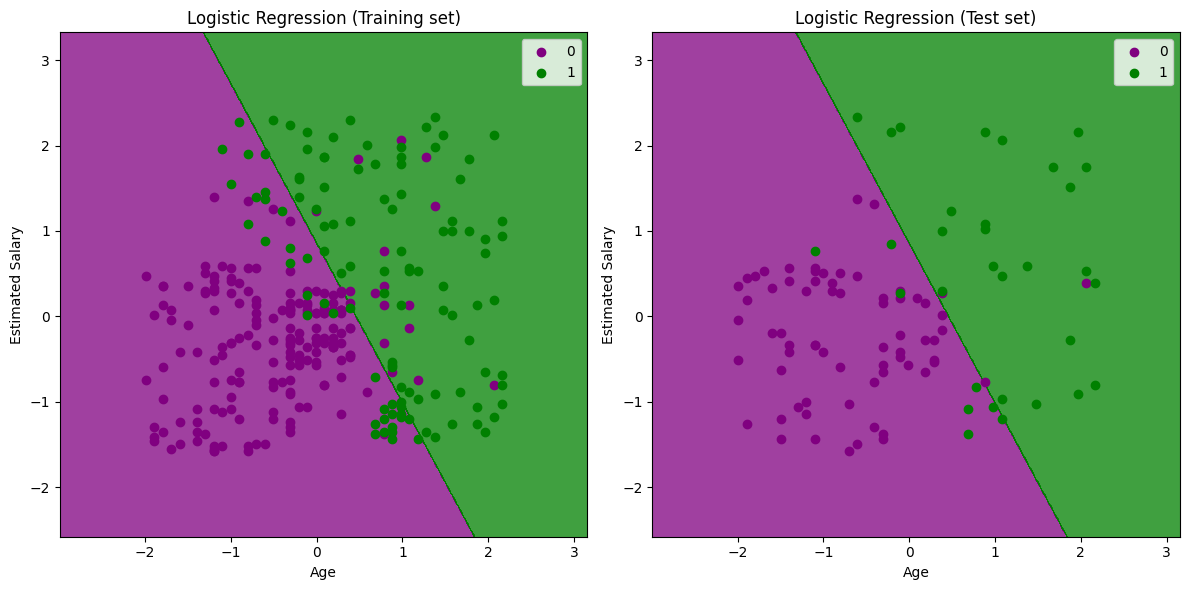

In [ ]:
# Visualizing Training and Test Set Results
from matplotlib.colors import ListedColormap

def visualize_results(x_set, y_set, title, position):
    x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                         nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
    mtp.subplot(1, 2, position)
    mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
                 alpha = 0.75, cmap = ListedColormap(('purple', 'green')))
    mtp.xlim(x1.min(), x1.max())
    mtp.ylim(x2.min(), x2.max())
    for i, j in enumerate(nm.unique(y_set)):
        mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                    color = ListedColormap(('purple', 'green'))(i), label = j)
    mtp.title(title)
    mtp.xlabel('Age')
    mtp.ylabel('Estimated Salary')
    mtp.legend()

mtp.figure(figsize=(12, 6))
# Visualize Training Set Results
visualize_results(x_train, y_train, 'Logistic Regression (Training set)', 1)

# Visualize Test Set Results
visualize_results(x_test, y_test, 'Logistic Regression (Test set)', 2)

mtp.tight_layout()
mtp.show()

# Conclusion

In this experiment, we applied the Logistic Regression algorithm to a dataset representing customer data, aiming to predict whether a customer would make a purchase based on their age and estimated salary. We pre-processed the data by splitting it into training and test sets, and standardizing the features. The Logistic Regression model was trained on the training set and evaluated on the test set. We visualized the results using contour plots, highlighting the decision boundary and data points categorized by their true labels. The experiment provided valuable insights into the application of Logistic Regression for binary classification tasks and the visualization of decision boundaries, contributing to our understanding of this fundamental machine learning technique.

### ***Assesment***

**1. What is a residual in linear regression and how is it used in model evaluation?**

In linear regression, a residual refers to the difference between the observed (actual) value of the dependent variable and the predicted value given by the regression model. Mathematically, the residual for the i-th data point is calculated as:

Residual[i] = Observed Value[i] - Predicted Value[i]

Residuals are used in model evaluation to assess the goodness of fit of the regression model. By analyzing the residuals, you can determine how well the model's predictions match the actual data. Key uses of residuals in model evaluation include:
- **Checking for linearity:** If the residuals exhibit a clear pattern or trend, it suggests that the linear assumption might not hold.
- **Assessing homoscedasticity:** Homoscedasticity means the residuals have constant variance across all levels of the predictor variables.
- **Identifying outliers:** Large residuals could indicate potential outliers or influential data points.
- **Model improvement:** Analyzing residuals might suggest ways to improve the model, such as adding higher-order terms or addressing multicollinearity.


---


**2. What is the difference between linear regression and non-linear regression? Explain with an example.**

Linear regression aims to model the relationship between the independent variable(s) and the dependent variable as a linear equation, typically represented as Y = mX + b, where Y is the dependent variable, X is the independent variable, m is the slope, and b is the intercept. Non-linear regression, on the other hand, allows for more complex relationships between variables by using non-linear equations.

Example:
- **Linear Regression:** Predicting a person's weight (Y) based on their height (X). The relationship might be assumed to be linear: taller people are generally heavier.
- **Non-linear Regression:** Predicting a person's blood pressure (Y) based on their age (X). The relationship could be more complex, following a non-linear pattern due to factors like age-related health changes.


---


**3. How do we measure the strength of a linear relationship between two variables? Is it important for linear regression?**

The strength of a linear relationship between two variables is often measured using the Pearson correlation coefficient (r). It quantifies the degree of linear dependence between two variables. The Pearson correlation coefficient ranges from -1 (perfect negative correlation) to 1 (perfect positive correlation), with 0 indicating no linear correlation.

Yes, the strength of a linear relationship is important for linear regression. Linear regression assumes a linear relationship between the independent and dependent variables. If the correlation between them is weak (close to 0), linear regression might not be the best choice, as it may not accurately capture the underlying patterns in the data.


---


**4. A model which is suffering from —--------------- (both training and test error are very high) will have high bias and low variance resulting in a very high loss (hence the high error). An algorithm having access to a larger hypothesis space (as a result of different training data sets, features, and hyperparameters) would result in models having higher —----------------. In other words, these models will be high —-------------.**

A model which is suffering from **underfitting** (both training and test error are very high) will have high bias and low variance resulting in a very high loss (hence the high error). An algorithm having access to a larger hypothesis space (as a result of different training data sets, features, and hyperparameters) would result in models having higher **capacity**. In other words, these models will be high **complexity**.


---


**5. Model bias can be lowered using good machine learning algorithms, unbiased training data, and —-----------------. Model variance can be lowered using good machine learning algorithms, a very large set of training data (more than required), and more —---------------------- or less noisy features if possible that are correlated to the target variable.**

Model bias can be lowered using good machine learning algorithms, unbiased training data, and **feature engineering**. Model variance can be lowered using good machine learning algorithms, a very large set of training data (more than required), and more **regularization techniques** or less noisy features if possible that are correlated to the target variable.